# Algorithme de la descente de gradient avec Numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Génération des données

In [8]:
np.random.seed(42)  # Pour la reproductibilité

# Nombre d'exemples
m = 100

# Génération de x uniformément dans [0, 10]
X = 10 * np.random.rand(m)

# Vraie relation linéaire : y = 3 * x + 4 + bruit
vrai_theta0 = 4
vrai_theta1 = 3
bruit = np.random.randn(m)  # bruit gaussien standard
y = vrai_theta0 + vrai_theta1 * X + bruit

# Ajout d'une colonne de 1 pour le biais (theta0)
X_biais = np.c_[np.ones((m, 1)), X.reshape(m, 1)]  # forme (m, 2)

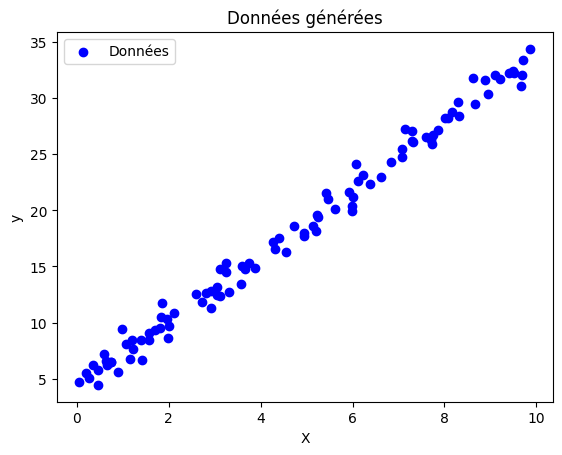

In [6]:
# Visualisation des données
plt.scatter(X, y, color='blue', label='Données')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Données générées')
plt.legend()
plt.show()

# 2. Implémentation de la descente de gradient

In [9]:
def calculer_cout(theta, X, y):
    """
    Calcule le coût J(theta) = (1/2m) * somme((X*theta - y)^2)
    """
    m = len(y)
    predictions = X.dot(theta)
    erreurs = predictions - y
    return (1 / (2 * m)) * np.dot(erreurs, erreurs)

In [10]:
def descente_gradient(X, y, alpha, n_iterations):
    """
    Exécute la descente de gradient.
    - X : matrice (m, 2) avec colonne de biais incluse
    - y : vecteur (m,)
    - alpha : taux d'apprentissage
    - n_iterations : nombre d'itérations
    Retourne theta (vecteur 2,) et l'historique des coûts.
    """
    m = len(y)
    theta = np.zeros(2)  # initialisation à zéro pour theta0 et theta1
    historique_cout = []

    for i in range(n_iterations):
        # Calcul du gradient : (1/m) * X^T * (X*theta - y)
        gradients = (1 / m) * X.T.dot(X.dot(theta) - y)
        # Mise à jour des paramètres
        theta = theta - alpha * gradients
        # Stockage du coût pour suivi
        historique_cout.append(calculer_cout(theta, X, y))

        # Affichage optionnel tous les 100 itérations
        if (i + 1) % 100 == 0:
            print(f"Iteration {i+1:4d} — Coût : {historique_cout[-1]:.4f}")

    return theta, historique_cout


In [12]:
# Paramètres de la descente de gradient
alpha = 0.01         # taux d'apprentissage
n_iterations = 1000  # nombre d'itérations


In [13]:
# Lancement de l'algorithme
theta_opt, historique = descente_gradient(X_biais, y, alpha, n_iterations)

Iteration  100 — Coût : 1.5029
Iteration  200 — Coût : 1.0343
Iteration  300 — Coût : 0.7653
Iteration  400 — Coût : 0.6110
Iteration  500 — Coût : 0.5225
Iteration  600 — Coût : 0.4717
Iteration  700 — Coût : 0.4425
Iteration  800 — Coût : 0.4258
Iteration  900 — Coût : 0.4162
Iteration 1000 — Coût : 0.4107


# 3. Affichage des résultats


In [14]:
print("\nParamètres optimisés :")
print(f"θ0 = {theta_opt[0]:.4f}")
print(f"θ1 = {theta_opt[1]:.4f}")


Paramètres optimisés :
θ0 = 3.9865
θ1 = 2.9892


# 4. Visualisation : données + droite de régression

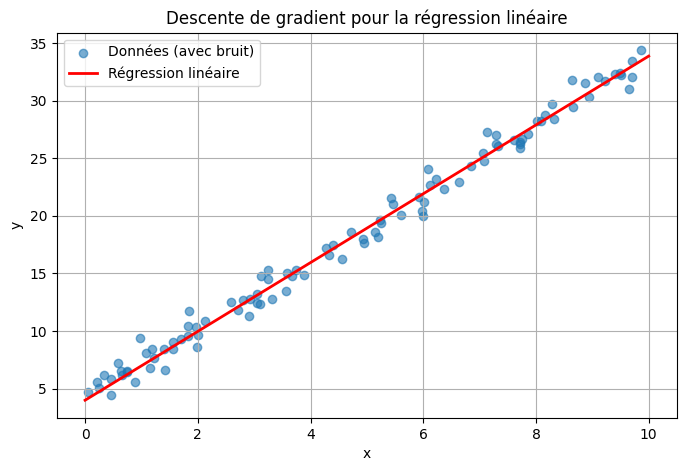

In [15]:
plt.figure(figsize=(8, 5))
plt.scatter(X, y, label="Données (avec bruit)", alpha=0.6)
# Tracé de la droite y = θ0 + θ1*x
x_tracé = np.array([0, 10])
y_tracé = theta_opt[0] + theta_opt[1] * x_tracé
plt.plot(x_tracé, y_tracé, color='red', linewidth=2, label="Régression linéaire")
plt.title("Descente de gradient pour la régression linéaire")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()